In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [3]:
TRAIN_DIR ='C:\\Users\\This PC\\.vscode\\cli\\mini project\\archive\\images\\train'
TEST_DIR = 'C:\\Users\\This PC\\.vscode\\cli\\mini project\\archive\\images\\test'

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [5]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
print(train)

                                                   image     label
0      C:\Users\This PC\.vscode\cli\mini project\arch...     angry
1      C:\Users\This PC\.vscode\cli\mini project\arch...     angry
2      C:\Users\This PC\.vscode\cli\mini project\arch...     angry
3      C:\Users\This PC\.vscode\cli\mini project\arch...     angry
4      C:\Users\This PC\.vscode\cli\mini project\arch...     angry
...                                                  ...       ...
28816  C:\Users\This PC\.vscode\cli\mini project\arch...  surprise
28817  C:\Users\This PC\.vscode\cli\mini project\arch...  surprise
28818  C:\Users\This PC\.vscode\cli\mini project\arch...  surprise
28819  C:\Users\This PC\.vscode\cli\mini project\arch...  surprise
28820  C:\Users\This PC\.vscode\cli\mini project\arch...  surprise

[28821 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(test)
print(test['image'])

                                                  image     label
0     C:\Users\This PC\.vscode\cli\mini project\arch...     angry
1     C:\Users\This PC\.vscode\cli\mini project\arch...     angry
2     C:\Users\This PC\.vscode\cli\mini project\arch...     angry
3     C:\Users\This PC\.vscode\cli\mini project\arch...     angry
4     C:\Users\This PC\.vscode\cli\mini project\arch...     angry
...                                                 ...       ...
7061  C:\Users\This PC\.vscode\cli\mini project\arch...  surprise
7062  C:\Users\This PC\.vscode\cli\mini project\arch...  surprise
7063  C:\Users\This PC\.vscode\cli\mini project\arch...  surprise
7064  C:\Users\This PC\.vscode\cli\mini project\arch...  surprise
7065  C:\Users\This PC\.vscode\cli\mini project\arch...  surprise

[7066 rows x 2 columns]
0       C:\Users\This PC\.vscode\cli\mini project\arch...
1       C:\Users\This PC\.vscode\cli\mini project\arch...
2       C:\Users\This PC\.vscode\cli\mini project\arch...
3       C

In [9]:
from tqdm.notebook import tqdm

In [10]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [11]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\This PC\AppData\Roaming\Python\Python313\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [12]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [13]:
x_train = train_features/255.0
x_test = test_features/255.0

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [16]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [17]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)


In [18]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

C:\Users\This PC\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']   # fixed: metrics must be a list
)


In [25]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 200s 869ms/step - accuracy: 0.2443 - loss: 1.8241 - val_accuracy: 0.2583 - val_loss: 1.8111
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 201s 891ms/step - accuracy: 0.2523 - loss: 1.8012 - val_accuracy: 0.2629 - val_loss: 1.7853
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 190s 842ms/step - accuracy: 0.2879 - loss: 1.7261 - val_accuracy: 0.3343 - val_loss: 1.6330
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 199s 882ms/step - accuracy: 0.3670 - loss: 1.5927 - val_accuracy: 0.4366 - val_loss: 1.4766
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 195s 864ms/step - accuracy: 0.4199 - loss: 1.4919 - val_accuracy: 0.4861 - val_loss: 1.3550
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 200s 885ms/step - accuracy: 0.4461 - loss: 1.4310 - val_accuracy: 0.5041 - val_loss: 1.3007
Epoch 7/100
141/226 ━━━━━━━━━━━━━━━━━━━━ 1:09 812ms/step - accuracy: 0.4697 - loss: 1.3838

KeyboardInterrupt: 

In [29]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [30]:
from keras.models import model_from_json

In [32]:
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")

In [33]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [35]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    
    

original image is of neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
model prediction is  neutral


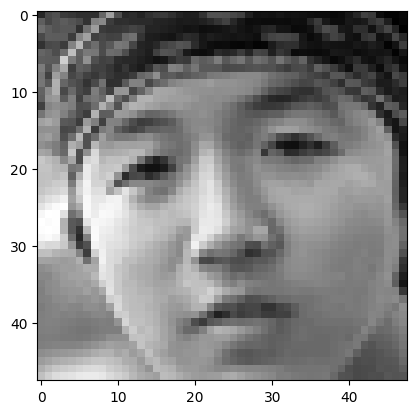

In [66]:
image = 'C:\\Users\\This PC\\.vscode\\cli\\mini project\\archive\\images\\train\\neutral\\11.jpg'
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
model prediction is  angry


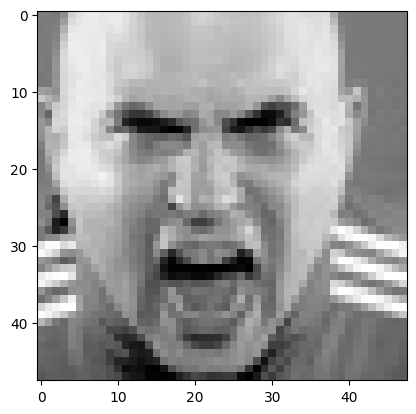

In [65]:
image = 'C:\\Users\\This PC\\.vscode\\cli\\mini project\\archive\\images\\train\\angry\\22.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
model prediction is  surprise


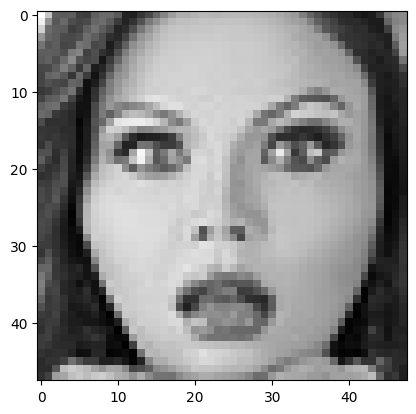

In [59]:
image = 'C:\\Users\\This PC\\.vscode\\cli\\mini project\\archive\\images\\train\\surprise\\81.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
model prediction is  sad


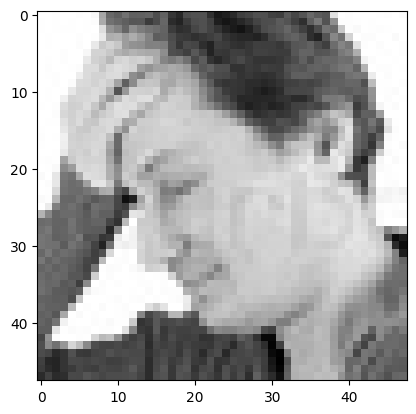

In [64]:
image = 'C:\\Users\\This PC\\.vscode\\cli\\mini project\\archive\\images\\train\\sad\\72.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
model prediction is  happy


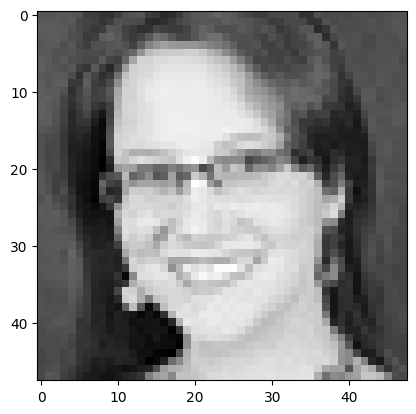

In [46]:
image = 'C:\\Users\\This PC\\.vscode\\cli\\mini project\\archive\\images\\train\\happy\\7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
model prediction is  neutral


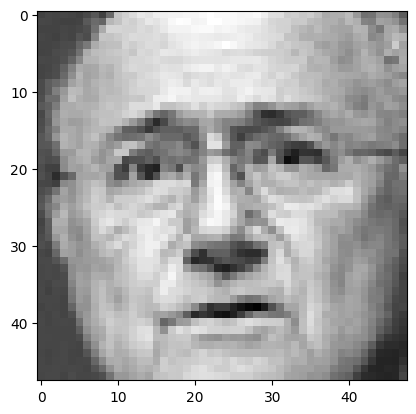

In [70]:
image = 'C:\\Users\\This PC\\.vscode\\cli\\mini project\\archive\\images\\train\\fear\\5.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')